## Predicting car price with Ebay data and K-Nearest Neighbor Regression

#### **Aim:** guess price'car based on its attributes using a linear regression method trained with data from Ebay sales car data
- The dataset can be found [there](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) and more information [here](https://archive.ics.uci.edu/ml/datasets/automobile)


- the different columns of the dataset:
    1. symboling: -3, -2, -1, 0, 1, 2, 3 (A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.) 
    2. normalized-losses: continuous from 65 to 256.
    3. make:
                alfa-romero, audi, bmw, chevrolet, dodge, honda,
                isuzu, jaguar, mazda, mercedes-benz, mercury,
                mitsubishi, nissan, peugot, plymouth, porsche,
                renault, saab, subaru, toyota, volkswagen, volvo

    4. fuel-type: diesel, gas.
    5. aspiration: std, turbo.
    6. num-of-doors: four, two.
    7. body-style: hardtop, wagon, sedan, hatchback, convertible.
    8. drive-wheels: 4wd, fwd, rwd.
    9. engine-location: front, rear.
    10. wheel-base: continuous from 86.6 120.9.
    11. length: continuous from 141.1 to 208.1.
    12. width: continuous from 60.3 to 72.3.
    13. height: continuous from 47.8 to 59.8.
    14. curb-weight: continuous from 1488 to 4066.
    15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
    16. num-of-cylinders: eight, five, four, six, three, twelve, two.
    17. engine-size: continuous from 61 to 326.
    18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
    19. bore: continuous from 2.54 to 3.94.
    20. stroke: continuous from 2.07 to 4.17.
    21. compression-ratio: continuous from 7 to 23.
    22. horsepower: continuous from 48 to 288.
    23. peak-rpm: continuous from 4150 to 6600.
    24. city-mpg: continuous from 13 to 49.
    25. highway-mpg: continuous from 16 to 54.
    26. price: continuous from 5118 to 45400.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

## Data exploration and cleaning

In [2]:
#fixing the columns name
col_names=["symboling","normalized_losses","brand", "fuel","aspiration","doors","body_style","drive_wheels","eng_loc","wheel_base","lenght","width","height","curb_weight","eng_type","cylinders","eng_size","fuel_system","bore","stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"]
len(col_names)

26

In [3]:
cars=pd.read_csv("imports-85.data",names=col_names)

In [4]:
cars.head()

,symboling,normalized_losses,brand,fuel,aspiration,doors,body_style,drive_wheels,eng_loc,wheel_base,lenght,width,height,curb_weight,eng_type,cylinders,eng_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
cars.describe()

,symboling,wheel_base,lenght,width,height,curb_weight,eng_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
cars.describe().columns

Index(['symboling', 'wheel_base', 'lenght', 'width', 'height', 'curb_weight',
       'eng_size', 'compression_ratio', 'city_mpg', 'highway_mpg'],
      dtype='object')

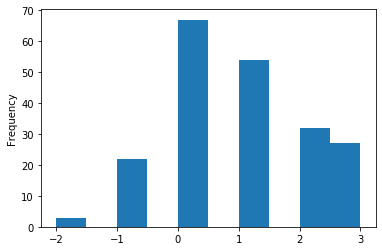

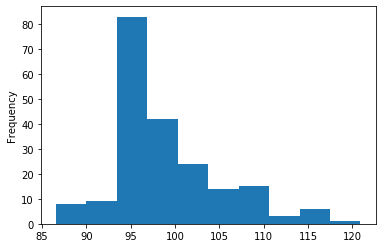

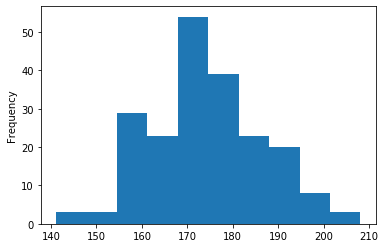

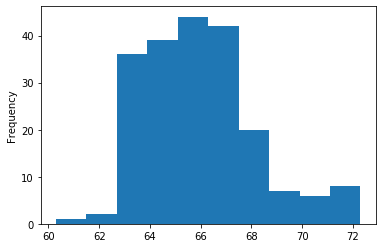

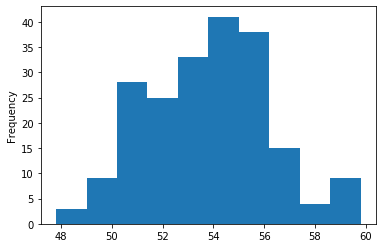

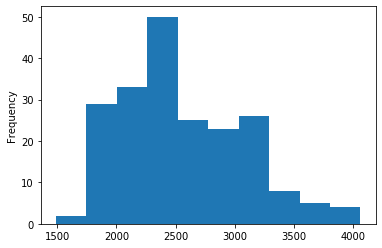

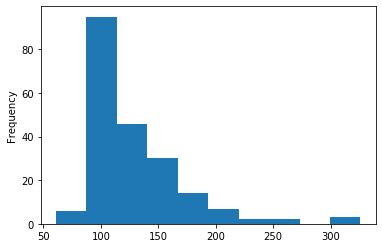

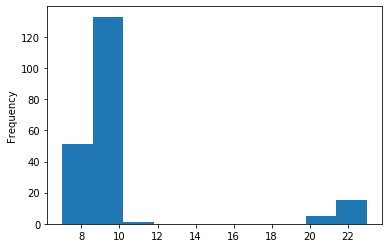

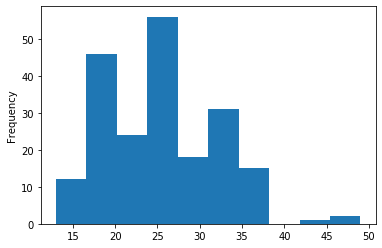

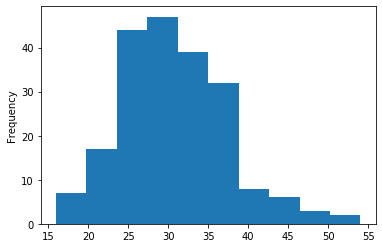

In [39]:
for col in cars.describe().columns:
    cars[col].plot.hist()
    plt.show()

The columns that might serve to train the model need to be of numerical type and without null values. 

In [40]:
# remove of the ? in the dataframe
cars = cars.replace('?',np.nan)

In [9]:
cars.head()

,symboling,normalized_losses,brand,fuel,aspiration,doors,body_style,drive_wheels,eng_loc,wheel_base,lenght,width,height,curb_weight,eng_type,cylinders,eng_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
# transform data type of the following coloumns explored with df.columns()
#col we gonna used as potentiel features to train regression model
col_numeric=['normalized_losses','wheel_base','lenght', 'width', 'height', 'curb_weight','eng_size','bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
       
numeric_cars=cars[col_numeric].astype(float)

In [11]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  164 non-null    float64
 1   wheel_base         205 non-null    float64
 2   lenght             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb_weight        205 non-null    float64
 6   eng_size           205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression_ratio  205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak_rpm           203 non-null    float64
 12  city_mpg           205 non-null    float64
 13  highway_mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB


In [12]:
#as we wanna guess the price, we remove the rows with empty price
#subset argument in .dropna is to define the criteria => if empty value in col price then remove the row....
numeric_cars= numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized_losses    37
wheel_base            0
lenght                0
width                 0
height                0
curb_weight           0
eng_size              0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [13]:
#fill up the rest of the Nan values with the averages of the col using the df.fillna() function. 
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized_losses    0
wheel_base           0
lenght               0
width                0
height               0
curb_weight          0
eng_size             0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [14]:
#normalisation of the df with (X-Xmin)/(Xmax-Xmin)
numeric_cars=(numeric_cars-numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())
#price col is still the same 
numeric_cars['price'] = cars['price'].astype(float)
numeric_cars.isnull().sum()

normalized_losses    0
wheel_base           0
lenght               0
width                0
height               0
curb_weight          0
eng_size             0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

## Univariate linear regression

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


# creation KNN model 
def knn_train_test(df, col_train, col_target,k=5):

    #randomisation of the df and reindexing
    shuffled_index=np.random.permutation(df.index)
    rand_df=df.reindex(shuffled_index)
    #split the dataset in the training dataset and the test dataset (75% 25%)
    train_df=df.iloc[0:int(len(df)*0.75)]
    test_df=df.iloc[int(len(df)*0.75):]
    
    #training model 
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[[col_train]],train_df[col_target])
    
    #prediction
    predictions = knn.predict(test_df[[col_train]])
    
    #report error true values vs predictions
    mse = mean_squared_error(test_df[col_target],predictions)
    rmse = np.sqrt(mse)
    
    return rmse

min rmse for normalized_losses is 7297 $ for k = 9
min rmse for wheel_base is 3367 $ for k = 1
min rmse for lenght is 5101 $ for k = 9
min rmse for width is 3361 $ for k = 7
min rmse for height is 5494 $ for k = 9
min rmse for curb_weight is 2467 $ for k = 5
min rmse for eng_size is 3091 $ for k = 9
min rmse for bore is 6517 $ for k = 9
min rmse for stroke is 4827 $ for k = 9
min rmse for compression_ratio is 4311 $ for k = 3
min rmse for horsepower is 3660 $ for k = 9
min rmse for peak_rpm is 6643 $ for k = 9
min rmse for city_mpg is 3292 $ for k = 9
min rmse for highway_mpg is 2357 $ for k = 9


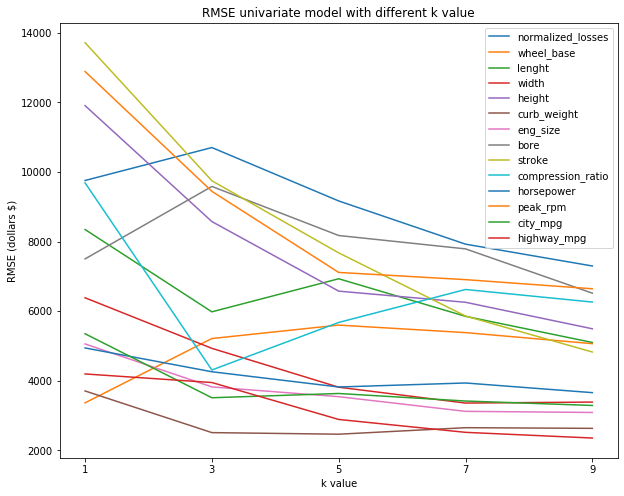

In [38]:
#selection of the columns as features
train_cols = numeric_cars.columns.drop('price')

#the different k values we gonna test
hp_k_values = [1,3,5,7,9]

#for the final plot
plt.figure(figsize=(10,8))

#loop through the numeric columns
for col in train_cols: 
    rmse_values=list()
    min_rmse=0
    k_min_rmse=0

    #loop throught a range value for the hyper parameter k
    for k in hp_k_values:
        rmse=knn_train_test(numeric_cars, col ,'price',k)
        rmse_values.append(rmse)
        
        if rmse < min_rmse or min_rmse ==0:
            min_rmse=rmse
            k_min_rmse=k
         
    print('min rmse for {0} is {1} $ for k = {2}'.format(col,int(min_rmse),k_min_rmse))  
   
    #plotting
    plt.plot(hp_k_values,rmse_values,label=col)
plt.ylabel("RMSE (dollars $)")
plt.xlabel("k value")
plt.title("RMSE univariate model with different k value")
plt.xticks(hp_k_values)
plt.legend()
plt.savefig('rmse_univariate.jpg')

so the 4 best variables to predict the sale prices of car are in order=
- highway_mpg using k = 9
- curb_weight using k = 5
- eng_size with k = 9
- city_mpg with k = 9
- width with k = 7

let's select these features gradually for training and test different k values again:

## Multivariate linear  regression

In [41]:
# creation KNN model 
def knn_train_test_multivariate(df, col_train, col_target,k=5):

    #randomisation of the df and reindexing
    shuffled_index=np.random.permutation(df.index)
    rand_df=df.reindex(shuffled_index)
    
    #split the dataset in the training and the test dataset (75% 25%)
    train_df=df.iloc[0:int(len(df)*0.75)]
    test_df=df.iloc[int(len(df)*0.75):]
    
    #training model 
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[col_train],train_df[col_target])
    
    #prediction
    predictions = knn.predict(test_df[col_train])
    
    #report error true values vs predictions
    mse = mean_squared_error(test_df[col_target],predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [18]:
#features sets
two_features=['highway_mpg','curb_weight']
three_features=['highway_mpg','curb_weight','eng_size']
four_features=['highway_mpg','curb_weight','eng_size','city_mpg']
five_features=['highway_mpg','curb_weight','eng_size','city_mpg','width']

In [19]:
#run the predictions
for features in two_features,three_features,four_features,five_features:
    rmse= knn_train_test_multivariate(numeric_cars, features ,'price',5)
    print('the rmse = {1}$ for {0}'.format(features, int(rmse)))

the rmse = 3071$ for ['highway_mpg', 'curb_weight']
the rmse = 2735$ for ['highway_mpg', 'curb_weight', 'eng_size']
the rmse = 2332$ for ['highway_mpg', 'curb_weight', 'eng_size', 'city_mpg']
the rmse = 2208$ for ['highway_mpg', 'curb_weight', 'eng_size', 'city_mpg', 'width']


So best rmse is best when using the 3,4 or 5 features but what about the k value? 

## Optimizing the hyperparameter k
The grid search for k value will be from 1 to 25 for the 3 best set of features 

min rmse for ['highway_mpg', 'curb_weight', 'eng_size'] is 2327 $ for k = 22
min rmse for ['highway_mpg', 'curb_weight', 'eng_size', 'city_mpg'] is 2107 $ for k = 10
min rmse for ['highway_mpg', 'curb_weight', 'eng_size', 'city_mpg', 'width'] is 1814 $ for k = 16


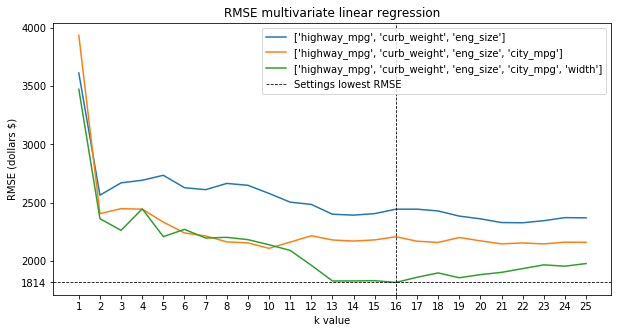

In [42]:
hp_k_values = range(1,26)
label_legend=['']

#for the final plot
plt.figure(figsize=(10,5))

#loop through the numeric columns
for features in three_features,four_features,five_features: 
    rmse_values=list()
    min_rmse=0
    k_min_rmse=0

    #loop throught a range value for the hyper parameter k
    for k in hp_k_values:
        rmse=knn_train_test_multivariate(numeric_cars, features ,'price',k)
        rmse_values.append(rmse)
        
        if rmse < min_rmse or min_rmse ==0:
            min_rmse=rmse
            k_min_rmse=k
         
    print('min rmse for {0} is {1} $ for k = {2}'.format(features,int(min_rmse),k_min_rmse))  
   
    #plotting
    plt.plot(hp_k_values,rmse_values,label=features)
plt.ylabel("RMSE (dollars $)")
plt.xlabel("k value")
plt.title("RMSE multivariate linear regression")
plt.xticks(hp_k_values)
plt.yticks([1814,2000,2500,3000,3500,4000])
plt.axvline(16,color='black',ls='--',linewidth=0.8)
plt.axhline(1814,color='black',ls='--',linewidth=0.8,label='Settings lowest RMSE')
plt.legend()
plt.savefig('rmse_multivariate.jpg')

so the best combination is:
- 5 features and k=16 => rmse = 1814$

- 4 features and k = 10 =>  rmse = 2107$

- 3 features and k=22 => rmse = 2327$


In [21]:
print(numeric_cars['price'].describe())

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64


In [22]:
print(1814/5118)
print(1814/45400)

0.35443532629933566
0.03995594713656388


## Conclusion
We managed to build a model who can predict the sale price of a car by approximativey 1800$, this deviation represents:
- 35% of the minimum price found in the dataset
- 4% of the maximum price found in the dataset

The deviation is still quite high (small data set) and aggregating more data might help to decrease it.


## Updates for the future:

- automatise the selection of the best features for univariate model by merging all best results in a pandas DataFrame
- modify the function to use the k-fold cross validation instead of splitting the dataset 75-25%
- generalize the function for similar datasets by incorporing the data cleaning within the function